In [1]:
import pandas as pd

In [ ]:
# checking the version of sklearn (should be >0.23.1)
import sklearn
sklearn.__version__

In [11]:
print(__doc__)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier 
#(or fron sklearn import tree 
# tree.DecisionTreeClassifier)

Automatically created module for IPython interactive environment


In [25]:
# Spliting the date into train and test data 
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

In [26]:
X_train.shape

(398, 30)

In [27]:
Y_test.shape

(171,)

In [29]:
# Building Decision Tree Model
D_clf = DecisionTreeClassifier(random_state = 0) #by default the model uses 'gini_impurity' method but can also use 'entropy'
# also have criterias like 'max_leaf_nodes', 'min_sample_leaf' etc to prevent overfitting 

# Fitting the model to the training data
D_clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
# predicting y values for X_test dataset
Ypredict = D_clf.predict(X_test)

In [32]:
# Checking the model accuracy

#using confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Ypredict))

# using classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Ypredict))

# using accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Ypredict))

[[59  4]
 [11 97]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        63
           1       0.96      0.90      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171

0.9122807017543859


[Text(562.8824999999999, 509.625, 'X[27] <= 0.142\ngini = 0.468\nsamples = 398\nvalue = [149, 249]'),
 Text(456.16499999999996, 441.675, 'X[23] <= 952.9\ngini = 0.147\nsamples = 263\nvalue = [21, 242]'),
 Text(343.16999999999996, 373.725, 'X[13] <= 35.26\ngini = 0.077\nsamples = 250\nvalue = [10, 240]'),
 Text(217.61999999999998, 305.775, 'X[27] <= 0.136\ngini = 0.034\nsamples = 232\nvalue = [4, 228]'),
 Text(133.92, 237.825, 'X[14] <= 0.003\ngini = 0.018\nsamples = 226\nvalue = [2, 224]'),
 Text(66.96, 169.875, 'X[14] <= 0.003\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(33.48, 101.92500000000001, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(100.44, 101.92500000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(200.88, 169.875, 'X[21] <= 32.78\ngini = 0.009\nsamples = 219\nvalue = [1, 218]'),
 Text(167.39999999999998, 101.92500000000001, 'gini = 0.0\nsamples = 202\nvalue = [0, 202]'),
 Text(234.35999999999999, 101.92500000000001, 'X[21] <= 33.805\ngini = 0.111\nsamp

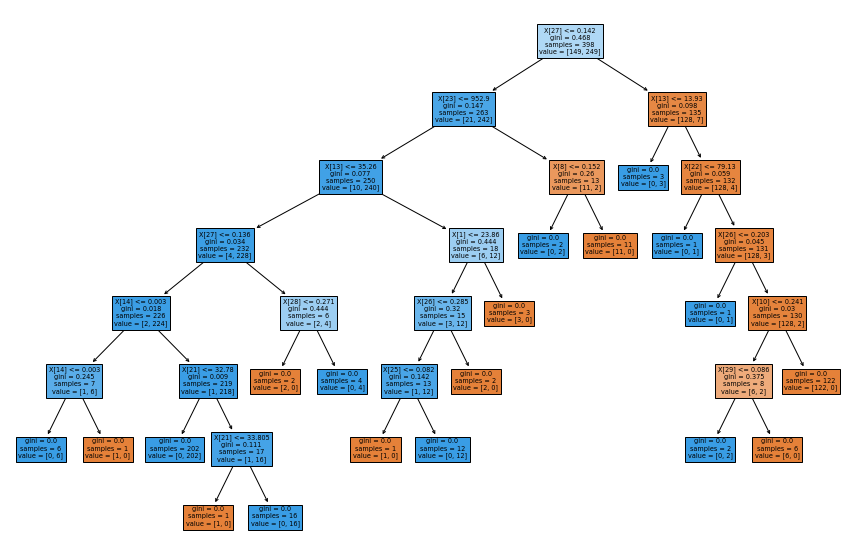

In [53]:
# Ploting decision tree
from sklearn import tree
plt.figure(figsize = (15, 10))
tree.plot_tree(D_clf, filled = True)

Text(0, 0.5, 'Model Accuracy')

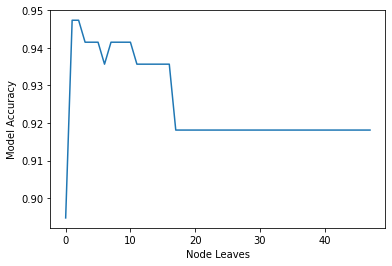

In [52]:
## Method 1: Model Optimization

# Model paramter ineration for accracy boost
acc_y = []
for i in range(2, 50):
    D_clf_2 = DecisionTreeClassifier(random_state = 0, max_leaf_nodes = i) #by default the model uses 'gini_impurity' method but can also use 'entropy'
    D_clf_2.fit(X_train, Y_train)
    Ypredict_2 = D_clf_2.predict(X_test)
    acc_y.append(accuracy_score(Y_test, Ypredict_2)) 


plt.plot(acc_y)
plt.xlabel('Node Leaves')
plt.ylabel('Model Accuracy')

In [54]:
# Method 2: Model Optimization

# Cost Complexity Pruning


In [57]:
path = D_clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [59]:
# building different classifier trees for each ccp_alpha values
clfs = []
for ccp_alpha in ccp_alphas:
    D_clf_3 = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    D_clf_3.fit(X_train, Y_train)
    clfs.append(D_clf_3)
    
print("Number of modes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of modes in the last tree is: 1 with ccp_alpha: 0.3379817186504386


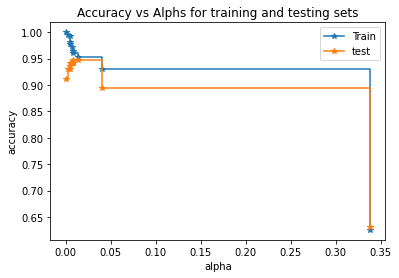

In [61]:
# calculating accuracy score for each classification tree using train and test datasets
train_score = [D_clf_.score(X_train, Y_train) for D_clf_ in clfs]
test_score = [D_clf_.score(X_test, Y_test) for D_clf_ in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs Alphs for training and testing sets')
ax.plot(ccp_alphas, train_score, marker = "*", label = "Train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_score, marker = "*", label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

In [63]:
# Building optimized classfication model
D_clf_final = DecisionTreeClassifier(random_state = 0, ccp_alpha = 0.03)
D_clf_final.fit(X_train, Y_train)
pred_final = D_clf_final.predict(X_test)
accuracy_score(Y_test, pred_final)

0.9473684210526315

[Text(200.88000000000002, 181.2, 'X[27] <= 0.142\ngini = 0.468\nsamples = 398\nvalue = [149, 249]'),
 Text(133.92000000000002, 108.72, 'X[23] <= 952.9\ngini = 0.147\nsamples = 263\nvalue = [21, 242]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.077\nsamples = 250\nvalue = [10, 240]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(267.84000000000003, 108.72, 'gini = 0.098\nsamples = 135\nvalue = [128, 7]')]

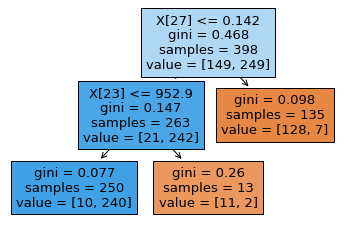

In [64]:
tree.plot_tree(D_clf_final, filled = True)
# tree depth reduced from 7 to 2
# reduced computation time and cost
# improved model accuracy from 91% to 94%